<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout4_Mean_and_Variance_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #4 : Mean and Variance Functions


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 4.1

For this example, we will consider data from the US Census Bureau.  The goal of this investigation is to understand the relationship betwewen Poverty and Median Household Income. In particular, the analysis should identify counties which have a higher than expected poverty levels.
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: % Poverty</li><br>
        <li><strong>Predictor</strong> Variables (i.e. independent variables)</li>
        <ul>
          <li>Median Household Income</li>
          <li>Percent Uninsured</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=14hl4EkQMBUmuxHBSLiCXgfkYszZD7onC"></img></p>
  </td>
</tr>
</table>

Original Data Sources: 


*   ACS 5 Year: https://api.census.gov/data/2020/acs/acs5?get=NAME,B01001_001E,B19013_001E&for=county:*
*   Subject - Poverty: https://api.census.gov/data/2020/acs/acs5/subject?get=NAME,S1701_C03_001E&for=county:*
*   SAHIE Uninsured: https://api.census.gov/data/timeseries/healthins/sahie?get=NAME,NIC_PT,NUI_PT,PCTUI_PT&for=county:*&time=2020




<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [ ]:
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The **read_csv()** function is used to read in the dataset. 

In [ ]:
# Reading data in using read_csv
USCountyIncome <- read_csv("http://www.StatsClass.org/stat360/Datasets/USCountyLevel_IncomePovertyUninsured.csv")

Rows: 3142 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): County_Name, State_Name, Region, Division, CurrentGovernorParty, St...
dbl (4): Population, MedianIncome_Household, PCT_Poverty, PCT_Uninsured

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The **head()** function can be used to see the first few lines of the dataset.

In [ ]:
# taking a look at the first few rows of data
head(USCountyIncome)

County_Name,State_Name,Region,Division,CurrentGovernorParty,State,STATE_FIPS,COUNTY_FIPS,FIPS,Population,MedianIncome_Household,PCT_Poverty,PCT_Uninsured
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
"Autauga County, AL",Alabama,South,East South Central,Republican,AL,01,001,01001,55639,57982,15.2,10.6
"Baldwin County, AL",Alabama,South,East South Central,Republican,AL,01,003,01003,218289,61756,9.2,10.9
"Barbour County, AL",Alabama,South,East South Central,Republican,AL,01,005,01005,25026,34990,28.6,14.4
"Bibb County, AL",Alabama,South,East South Central,Republican,AL,01,007,01007,22374,51721,18.1,13.0
"Blount County, AL",Alabama,South,East South Central,Republican,AL,01,009,01009,57755,48922,13.7,13.3
"Bullock County, AL",Alabama,South,East South Central,Republican,AL,01,011,01011,10173,33866,29.5,12.4


## Understanding the Distribution of Poverty | Income 

The goal of this investigation is to understand the relationship between % Poverty and Median Household Income.  To begin, we will obtain a simple summary of each of these variables.

In [ ]:
# Summaries of the data.frame
(USCountyIncome
  %>% select(MedianIncome_Household, PCT_Poverty)
  %>% summary()
)

 MedianIncome_Household  PCT_Poverty  
 Min.   : 22292         Min.   : 0.0  
 1st Qu.: 45658         1st Qu.:10.3  
 Median : 52856         Median :13.6  
 Mean   : 55015         Mean   :14.6  
 3rd Qu.: 61502         3rd Qu.:17.8  
 Max.   :147111         Max.   :58.9  

Next, let us consider a scatterplot of the % Poverty and Median Household Income.

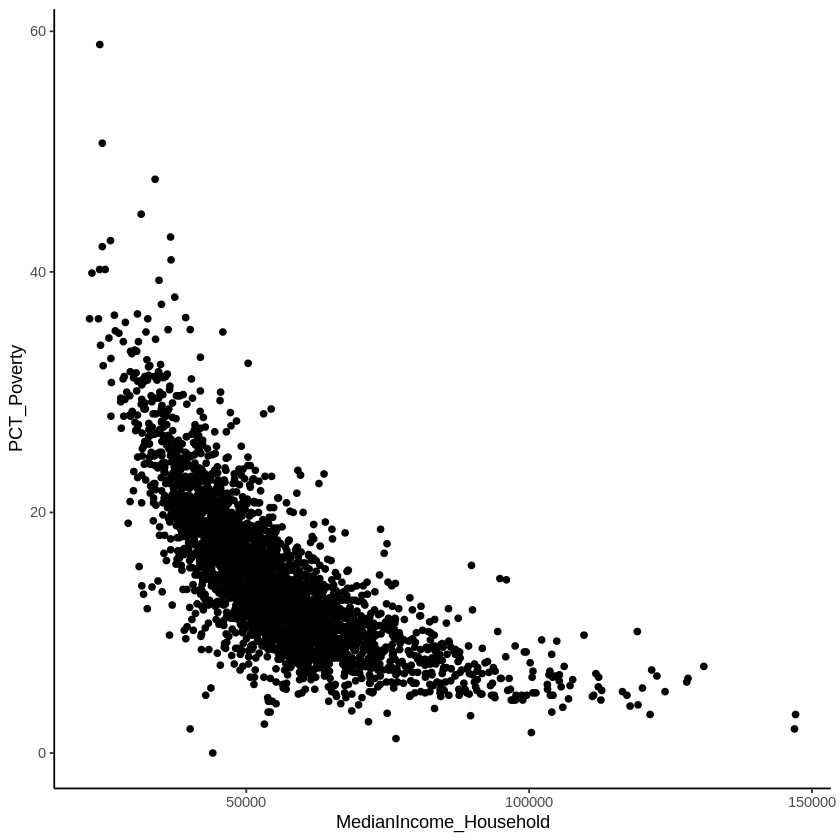

In [ ]:
# First scatterplot
ggplot(data=USCountyIncome, aes(x=MedianIncome_Household, y=PCT_Poverty) ) + 
  geom_point() + 
  theme_classic()

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions



1.   Describe the relationship between % Poverty and Median Household Income.






2.   Does the mean of % Poverty appear to change as a function of Median Household Income?  Explain.


3.   Does the variance of % Poverty appear to change as a function of Median Household Income?  Discuss.

<table width='100%'><tr><td bgcolor="purple"><font size="+2">&nbsp;</font></td></tr></table>

## Smoothing a Scatterplot

A scatterplot **smoother** can be used to investigate the relationship between two continuous variables.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1GYelLtRRi7SPMWH9NgoQyZJNfC8QYWvO"></img></p>

Wiki Source: https://en.wikipedia.org/wiki/Smoothing

The **geom_smooth()** function can be used in ggplot() to smooth a scatterplot. 



*   Method: specifies the type of smoother to use, e.g. lm = linear model or loess = locally estimated scatterplot smoothing
*   Formula: specifies the form of mathematical function used for smoothing
*   SE: specifies whether or not to add the standard error band about the smoother



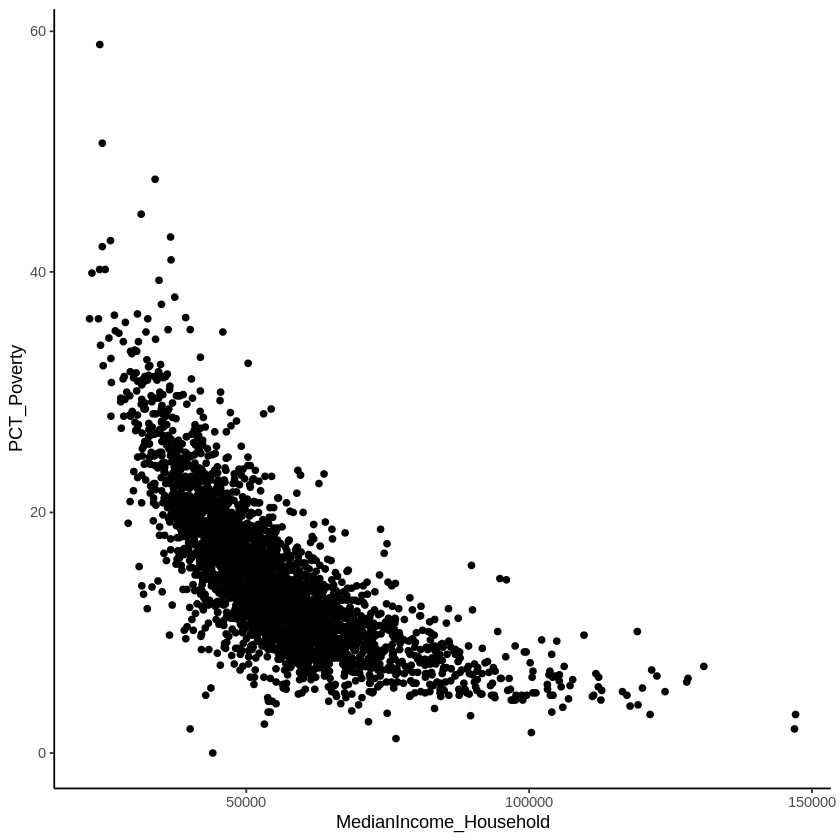

In [ ]:
# Adding a smoother to scatterplot
ggplot(data=USCountyIncome, aes(x=MedianIncome_Household, y=PCT_Poverty) ) + 
  geom_point() + 
  #geom_smooth(method = 'lm', formula = y ~ x, se = FALSE) + 
  #geom_smooth(method = 'lm', formula = y ~ poly(x,2), se = FALSE) + 
  #geom_smooth(method='loess', formula = y ~ x, se = FALSE) + 
  #geom_smooth(method='loess', formula = y ~ x, se = FALSE, span=0.50) + 
  theme_classic()

### LOESS Smoother

Consider the following elements of a **Locally Estimated Scatterplot Smoother (LOESS)**.

*    Span
*    Form
*    Weights

**Span**:  Determines the window size

<table>
  <tr>
    <td align="center" valign="top" width="50%"><font size="+1">Larger Span = Larger Window</font>
    </td>
    <td align="center" valign="top" width="50%"><font size="+1">Smaller Span = Smaller Window</font>
    </td>
  </tr>
  <tr>
    <td align="center" valign="top" width="50%">
        <img src="https://drive.google.com/uc?export=view&id=1FmzVggbLrP6xSueJZUra8M9LGbxJwFtO"></img>
    </td>
    <td align="center" valign="top" width="50%">
        <img src="https://drive.google.com/uc?export=view&id=1INCFFhkN6l_oxLym-2l-bX5q4hoTLKk0"></img>
    </td>
  </tr>
</table>


**Form**:  Specifies the form of mathematical model fit within each window

<table>
  <tr>
    <td align="center" valign="top" width="50%"><font size="+1">Form = Linear</font>
    </td>
    <td align="center" valign="top" width="50%"><font size="+1">Form = Quadratic</font>
    </td>
  </tr>
  <tr>
    <td align="center" valign="top" width="50%">
        <img src="https://drive.google.com/uc?export=view&id=1O6SES9bTx0OiY0lIRR2OLHZYKG4xuXx4"></img>
    </td>
    <td align="center" valign="top" width="50%">
        <img src="https://drive.google.com/uc?export=view&id=1hN0PrmyylTjKjtR6KYEoGMt2MWTID5Wt"></img>
    </td>
  </tr>
</table>

**Weights**:  Specification of the weighting scheme used when fitting the model within the window

<table>
  <tr>
    <td align="center" valign="top" width="50%"><font size="+1">Weights = Normal</font>
    </td>
    <td align="center" valign="top" width="50%"><font size="+1">Weights = Uniform</font>
    </td>
  </tr>
  <tr>
    <td align="center" valign="top" width="50%">
        <img src="https://drive.google.com/uc?export=view&id=1T5lOSnc4yhi4yxPkdQRYoekEdhZJc6MB"></img>
    </td>
    <td align="center" valign="top" width="50%">
        <img src="https://drive.google.com/uc?export=view&id=1z2BwUp_8gUikxztZt6iZaf4iRIO0kWsQ"></img>
    </td>
  </tr>
</table>


After fitting a model in this window, the window is slid up and the process of fitting a model within the window is repeated.

The following code will fit a LOESS smoother for our investigation here.

In [ ]:
#Fit the loess smoother
LoessModel_Poverty_Income <- loess(PCT_Poverty ~ MedianIncome_Household, data = USCountyIncome)
LoessModel_Poverty_Income

Call:
loess(formula = PCT_Poverty ~ MedianIncome_Household, data = USCountyIncome)

Number of Observations: 3142 
Equivalent Number of Parameters: 5.56 
Residual Standard Error: 3.51 

Next, the **predict()** function can be used to obtain predictions from this loess smoother.

In [ ]:
#Add predicted values for mean function to dataframe
(USCountyIncome
   %>% mutate(
                Predicted_Poverty = predict(LoessModel_Poverty_Income, newdata=USCountyIncome) 
             )
   %>% select(County_Name, State, FIPS, MedianIncome_Household, PCT_Poverty, Predicted_Poverty )
) -> USCountyIncome_with_Predicted

#View the first few rows of updated data.frame
head(USCountyIncome_with_Predicted)

County_Name,State,FIPS,MedianIncome_Household,PCT_Poverty,Predicted_Poverty
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
"Autauga County, AL",AL,01001,57982,15.2,11.94248
"Baldwin County, AL",AL,01003,61756,9.2,10.91156
"Barbour County, AL",AL,01005,34990,28.6,24.95360
"Bibb County, AL",AL,01007,51721,18.1,14.31671
"Blount County, AL",AL,01009,48922,13.7,15.59635
"Bullock County, AL",AL,01011,33866,29.5,26.00819


Here, plotting the predictions from the LOESS smoother onto the scatterplot.  Notice, geom_line is being used here to plot the Predicted_Poverty values from the data.frame.

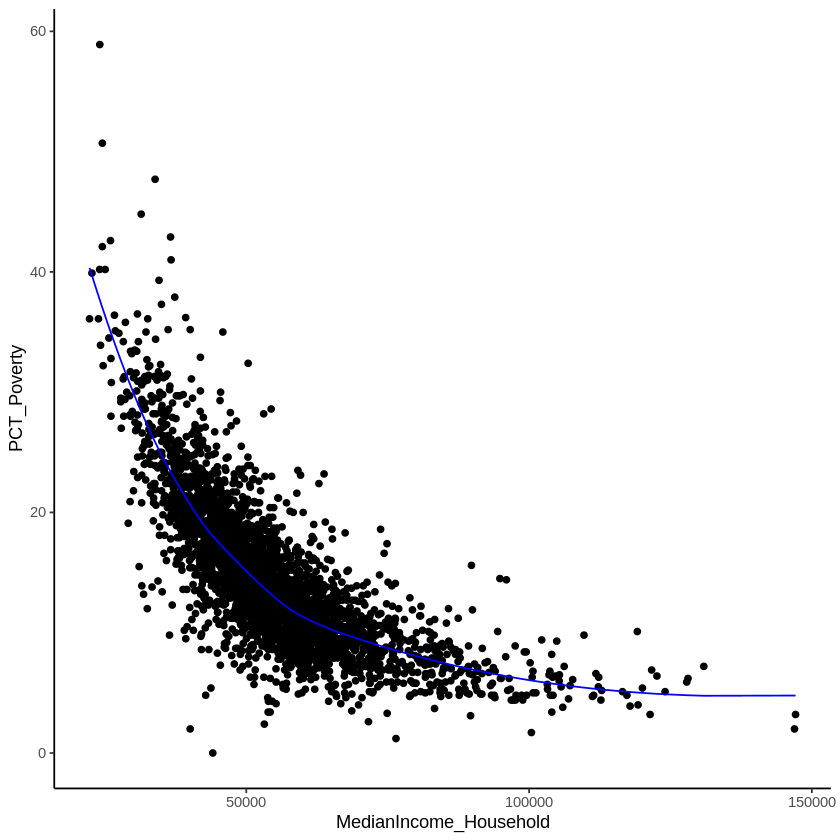

In [ ]:
#Create plot with Conditional Mean Function via Loess
ggplot(data=USCountyIncome_with_Predicted, aes(x=MedianIncome_Household,y=PCT_Poverty)) + 
  geom_point() + 
  geom_line(aes(x=MedianIncome_Household, y=Predicted_Poverty), col="blue") +
  theme_classic()

The following code will compute the Residuals from this fit.

In [ ]:
#Appending the residuals and their squared values to USCountyIncome the data.frame
(USCountyIncome_with_Predicted
                    %>% mutate(Residual = PCT_Poverty - Predicted_Poverty)
                    %>% mutate(ResidualSquared = Residual^2)
) -> USCountyIncome_with_Predicted_Residuals

head(USCountyIncome_with_Predicted_Residuals)

County_Name,State,FIPS,MedianIncome_Household,PCT_Poverty,Predicted_Poverty,Residual,ResidualSquared
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Autauga County, AL",AL,01001,57982,15.2,11.94248,3.257521,10.611441
"Baldwin County, AL",AL,01003,61756,9.2,10.91156,-1.711556,2.929423
"Barbour County, AL",AL,01005,34990,28.6,24.95360,3.646401,13.296239
"Bibb County, AL",AL,01007,51721,18.1,14.31671,3.783289,14.313275
"Blount County, AL",AL,01009,48922,13.7,15.59635,-1.896353,3.596154
"Bullock County, AL",AL,01011,33866,29.5,26.00819,3.491807,12.192718


Next, computing the Sum of Squared Errors.

$$SSE = \sum{(Residuals)^2}$$

In [ ]:
(USCountyIncome_with_Predicted_Residuals
  %>% summarize(
                  SSE = sum(ResidualSquared)
               )
)

SSE
<dbl>
38619.66


Getting the "average" residual -- often referred to as $\mbox{Root Mean Squared Error (RMSE)}$.  This quantity is the *standard deviation* in the conditional distribution.

$$ \begin{array}{rcl}
\mbox{Residual Mean Squared Error}  & = & \sqrt{\frac{\mbox{Sum of Squared Error}}{(n-\mbox{# parameters in model})}} \\
& = & \sqrt{\frac{38534.4}{3142 - 8.1}} \\
& = & \sqrt{12.29} \\
& = & 3.507
\end{array}
$$

After a mean and standard deviation are obtained for the conditional distribution, the following lower and upper bound should capture about 95\% of the individual data values.

$$ \mbox{Lower Bound} = \mbox{Predicted_Poverty} - (2 * 3.507)
$$

$$ \mbox{Upper Bound} = \mbox{Predicted_Poverty} + (2 * 3.507)
$$


The following code will compute the lower and upper bound.

In [ ]:
(USCountyIncome_with_Predicted_Residuals
  %>% mutate(
              LowerBound = Predicted_Poverty - (2 * 3.507),
              UpperBound = Predicted_Poverty + (2 * 3.507)
            )
) -> USCountyIncome_with_Predicted_Residuals_Bounds 

head(USCountyIncome_with_Predicted_Residuals_Bounds)

County_Name,State,FIPS,MedianIncome_Household,PCT_Poverty,Predicted_Poverty,Residual,ResidualSquared,LowerBound,UpperBound
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Autauga County, AL",AL,01001,57982,15.2,11.94248,3.257521,10.611441,4.928479,18.95648
"Baldwin County, AL",AL,01003,61756,9.2,10.91156,-1.711556,2.929423,3.897556,17.92556
"Barbour County, AL",AL,01005,34990,28.6,24.95360,3.646401,13.296239,17.939599,31.96760
"Bibb County, AL",AL,01007,51721,18.1,14.31671,3.783289,14.313275,7.302711,21.33071
"Blount County, AL",AL,01009,48922,13.7,15.59635,-1.896353,3.596154,8.582353,22.61035
"Bullock County, AL",AL,01011,33866,29.5,26.00819,3.491807,12.192718,18.994193,33.02219


Adding these bounds to the scatterplot.

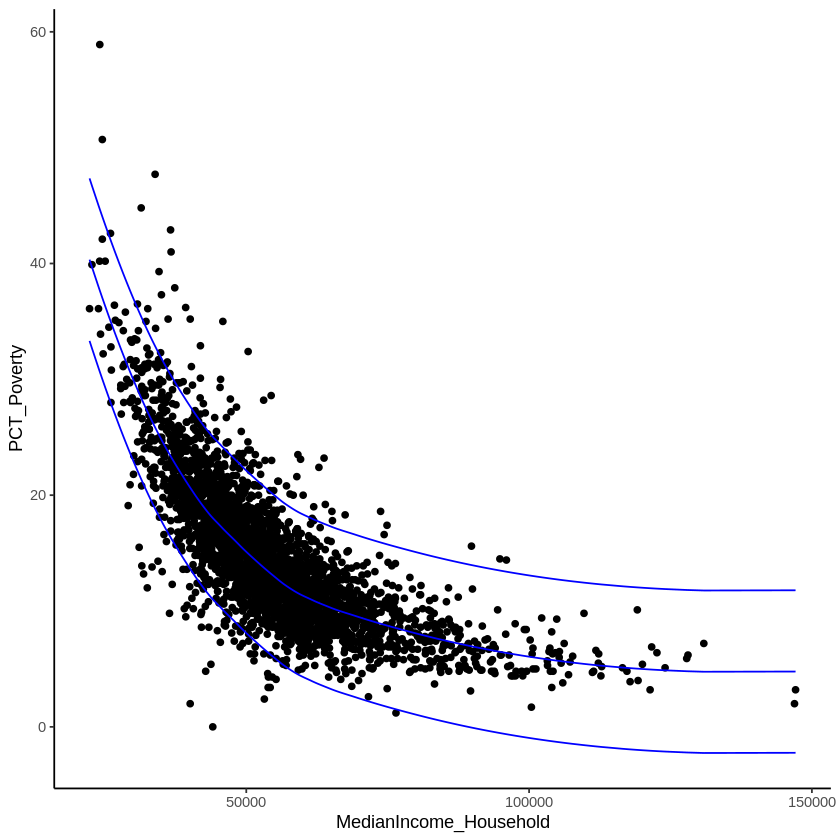

In [ ]:
#Create plot with Conditional Mean Function via Loess
ggplot(data=USCountyIncome_with_Predicted_Residuals_Bounds, aes(x=MedianIncome_Household,y=PCT_Poverty)) + 
  geom_point() + 
  geom_line(aes(x=MedianIncome_Household, y=Predicted_Poverty), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=LowerBound), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=UpperBound), col="blue") +
  theme_classic()

### Variance Function via Squared Residuals

Consider the following plot of the Residual Squared against Median Household Income.

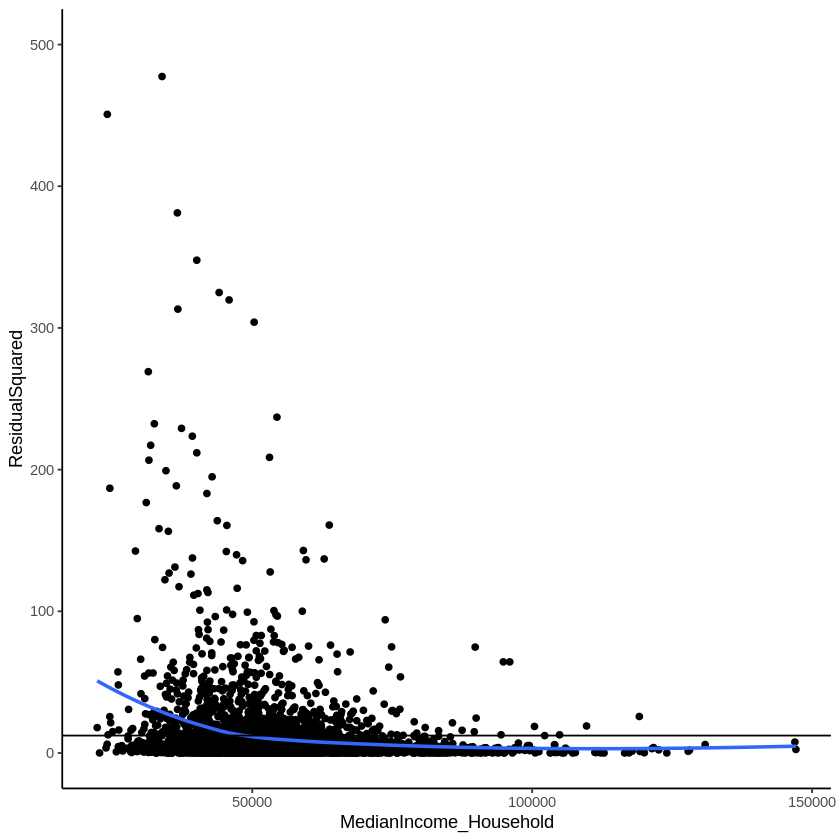

In [ ]:
#Create plot with Conditional Mean Function via Loess
ggplot(data=USCountyIncome_with_Predicted_Residuals, aes(x=MedianIncome_Household,y=ResidualSquared)) + 
  geom_point() + 
  geom_smooth(method="loess", formula = y~x, se = FALSE) + 
  geom_abline(intercept=12.29,slope=0) + 
  ylim(0,500) + 
  theme_classic()

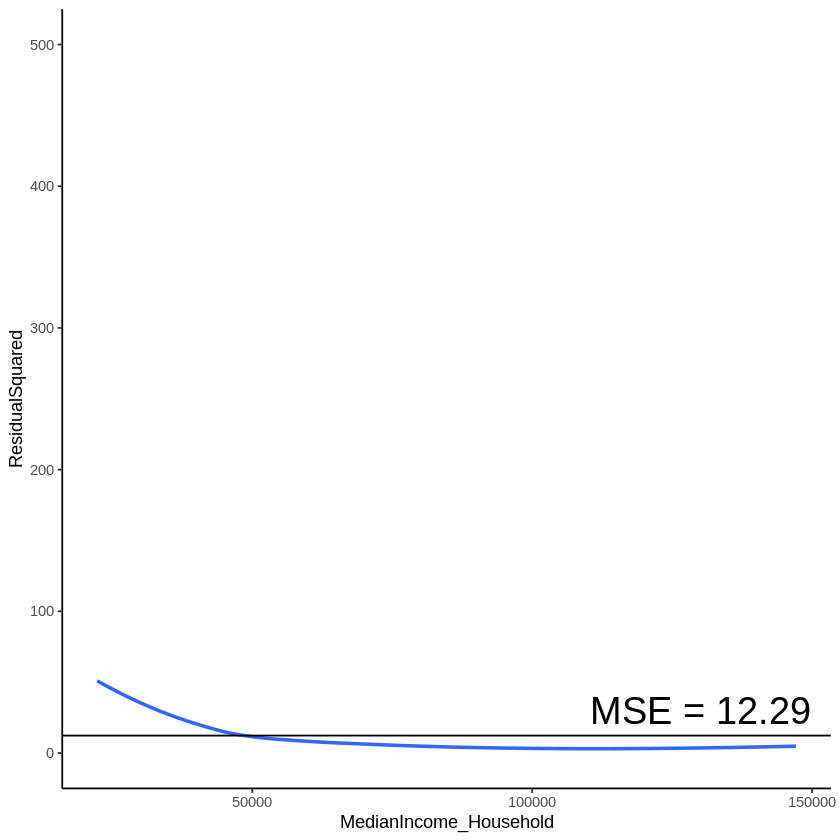

In [ ]:
#Create plot with Conditional Mean Function via Loess
ggplot(data=USCountyIncome_with_Predicted_Residuals, aes(x=MedianIncome_Household,y=ResidualSquared)) + 
  #geom_point() + 
  geom_smooth(method="loess", formula = y~x, se = FALSE) + 
  geom_abline(intercept=12.29,slope=0) + 
  ylim(0,500) + 
  annotate(
           "text", label = "MSE = 12.29",
            x = 130000, y = 30, size = 8, colour = "black"
  ) + 
  theme_classic()


Next, fit a loess smoother for the variance function.

In [ ]:
#Fit the loess smoother
LoessModel_ResidualSquared_Income <- loess(ResidualSquared ~ MedianIncome_Household, data = USCountyIncome_with_Predicted_Residuals)

In [ ]:
#Add predicted values for mean function to dataframe
(USCountyIncome_with_Predicted_Residuals
   %>% mutate(
                Predicted_ResidualSquared = predict(LoessModel_ResidualSquared_Income, newdata=USCountyIncome_with_Predicted_Residuals) 
             )
) -> USCountyIncome_with_Predicted_AbsResiduals_Predicted_ResidualSquared

#View the first few rows of updated data.frame
head(USCountyIncome_with_Predicted_AbsResiduals_Predicted_ResidualSquared)

County_Name,State,FIPS,MedianIncome_Household,PCT_Poverty,Predicted_Poverty,Residual,ResidualSquared,Predicted_ResidualSquared
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Autauga County, AL",AL,01001,57982,15.2,11.94248,3.257521,10.611441,8.749994
"Baldwin County, AL",AL,01003,61756,9.2,10.91156,-1.711556,2.929423,7.792982
"Barbour County, AL",AL,01005,34990,28.6,24.95360,3.646401,13.296239,27.373162
"Bibb County, AL",AL,01007,51721,18.1,14.31671,3.783289,14.313275,10.707907
"Blount County, AL",AL,01009,48922,13.7,15.59635,-1.896353,3.596154,12.132075
"Bullock County, AL",AL,01011,33866,29.5,26.00819,3.491807,12.192718,29.131407


Getting an updated lower and upper bounds using a variance function that depends on Median Household Income.

$$ \mbox{Lower Bound} = \mbox{Predicted_Poverty} - (2 * \sqrt{\mbox{Predicted_ResidualSquared }})
$$

$$ \mbox{Upper Bound} = \mbox{Predicted_Poverty} + (2 * \sqrt{\mbox{Predicted_ResidualSquared }})
$$

### Variance Function via |Residual|

In [ ]:
#Getting the |Residuals|
(USCountyIncome_with_Predicted
                    %>% mutate(Residual = PCT_Poverty - Predicted_Poverty)
                    %>% mutate(AbsResidual = abs(Residual))
) -> USCountyIncome_with_Predicted_AbsResiduals

head(USCountyIncome_with_Predicted_AbsResiduals)

County_Name,State,FIPS,MedianIncome_Household,PCT_Poverty,Predicted_Poverty,Residual,AbsResidual
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Autauga County, AL",AL,01001,57982,15.2,11.94248,3.257521,3.257521
"Baldwin County, AL",AL,01003,61756,9.2,10.91156,-1.711556,1.711556
"Barbour County, AL",AL,01005,34990,28.6,24.95360,3.646401,3.646401
"Bibb County, AL",AL,01007,51721,18.1,14.31671,3.783289,3.783289
"Blount County, AL",AL,01009,48922,13.7,15.59635,-1.896353,1.896353
"Bullock County, AL",AL,01011,33866,29.5,26.00819,3.491807,3.491807


Investigating the variance function using the $|Residuals|$ instead of $(Residuals)^2$.

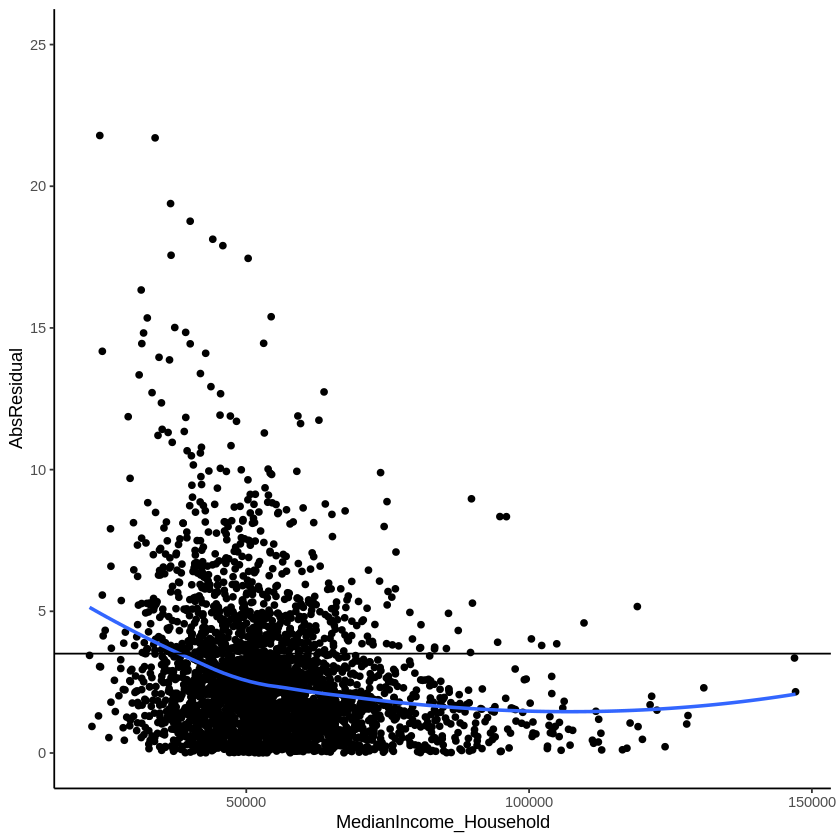

In [ ]:
#Create plot with Conditional Variance Function via Loess
ggplot(data=USCountyIncome_with_Predicted_AbsResiduals, aes(x=MedianIncome_Household,y=AbsResidual)) + 
  geom_point() + 
  geom_smooth(method="loess", formula = y~x, se = FALSE) + 
  geom_abline(intercept=3.507,slope=0) + 
  ylim(0,25) + 
  theme_classic()

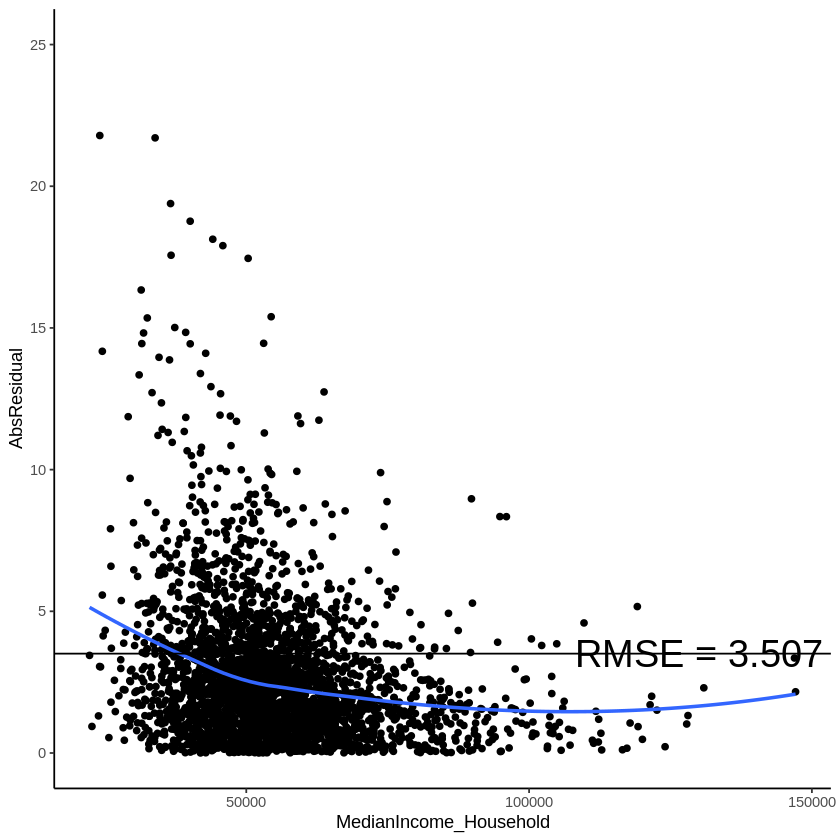

In [ ]:
#Create plot with Conditional Variance Function via Loess
ggplot(data=USCountyIncome_with_Predicted_AbsResiduals, aes(x=MedianIncome_Household,y=AbsResidual)) + 
  geom_point() + 
  geom_smooth(method="loess", formula = y~x, se = FALSE) + 
  geom_abline(intercept=3.507,slope=0) + 
  ylim(0,25) + 
  annotate(
           "text", label = "RMSE = 3.507",
            x = 130000, y = 3.507, size = 8, colour = "black"
  ) + 
  theme_classic()

Fitting a LOESS Smoother for the variance function.

In [ ]:
#Fit the loess smoother
LoessModel_AbsResidual_Income <- loess(AbsResidual ~ MedianIncome_Household, data = USCountyIncome_with_Predicted_AbsResiduals)

In [ ]:
#Add predicted values for mean function to dataframe
(USCountyIncome_with_Predicted_AbsResiduals
   %>% mutate(
                Predicted_AbsResidual = predict(LoessModel_AbsResidual_Income, newdata=USCountyIncome_with_Predicted_AbsResiduals) 
             )
) -> USCountyIncome_with_Predicted_AbsResiduals_Predicted_AbsResidual

#View the first few rows of updated data.frame
head(USCountyIncome_with_Predicted_AbsResiduals_Predicted_AbsResidual)

County_Name,State,FIPS,MedianIncome_Household,PCT_Poverty,Predicted_Poverty,Residual,AbsResidual,Predicted_AbsResidual
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Autauga County, AL",AL,01001,57982,15.2,11.94248,3.257521,3.257521,2.265625
"Baldwin County, AL",AL,01003,61756,9.2,10.91156,-1.711556,1.711556,2.148736
"Barbour County, AL",AL,01005,34990,28.6,24.95360,3.646401,3.646401,3.805858
"Bibb County, AL",AL,01007,51721,18.1,14.31671,3.783289,3.783289,2.469982
"Blount County, AL",AL,01009,48922,13.7,15.59635,-1.896353,1.896353,2.618687
"Bullock County, AL",AL,01011,33866,29.5,26.00819,3.491807,3.491807,3.914746


The lower and upper bounds using the $|Residuals|$ variance function.

$$ \mbox{Lower Bound} = \mbox{Predicted_Poverty} - (2 * \mbox{Predicted_AbsResidual})
$$

$$ \mbox{Upper Bound} = \mbox{Predicted_Poverty} + (2 * \mbox{Predicted_AbsResidual})
$$

In [ ]:
(USCountyIncome_with_Predicted_AbsResiduals_Predicted_AbsResidual
 %>% mutate(
              LowerBound = Predicted_Poverty - (2 * Predicted_AbsResidual),
              UpperBound = Predicted_Poverty + (2 * Predicted_AbsResidual)
           )
) -> USCountyIncome_with_Predicted_AbsResiduals_Predicted_AbsResidual_Bounds

head(USCountyIncome_with_Predicted_AbsResiduals_Predicted_AbsResidual_Bounds)

County_Name,State,FIPS,MedianIncome_Household,PCT_Poverty,Predicted_Poverty,Residual,AbsResidual,Predicted_AbsResidual,LowerBound,UpperBound
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Autauga County, AL",AL,01001,57982,15.2,11.94248,3.257521,3.257521,2.265625,7.411229,16.47373
"Baldwin County, AL",AL,01003,61756,9.2,10.91156,-1.711556,1.711556,2.148736,6.614084,15.20903
"Barbour County, AL",AL,01005,34990,28.6,24.95360,3.646401,3.646401,3.805858,17.341883,32.56531
"Bibb County, AL",AL,01007,51721,18.1,14.31671,3.783289,3.783289,2.469982,9.376747,19.25668
"Blount County, AL",AL,01009,48922,13.7,15.59635,-1.896353,1.896353,2.618687,10.358979,20.83373
"Bullock County, AL",AL,01011,33866,29.5,26.00819,3.491807,3.491807,3.914746,18.178702,33.83768


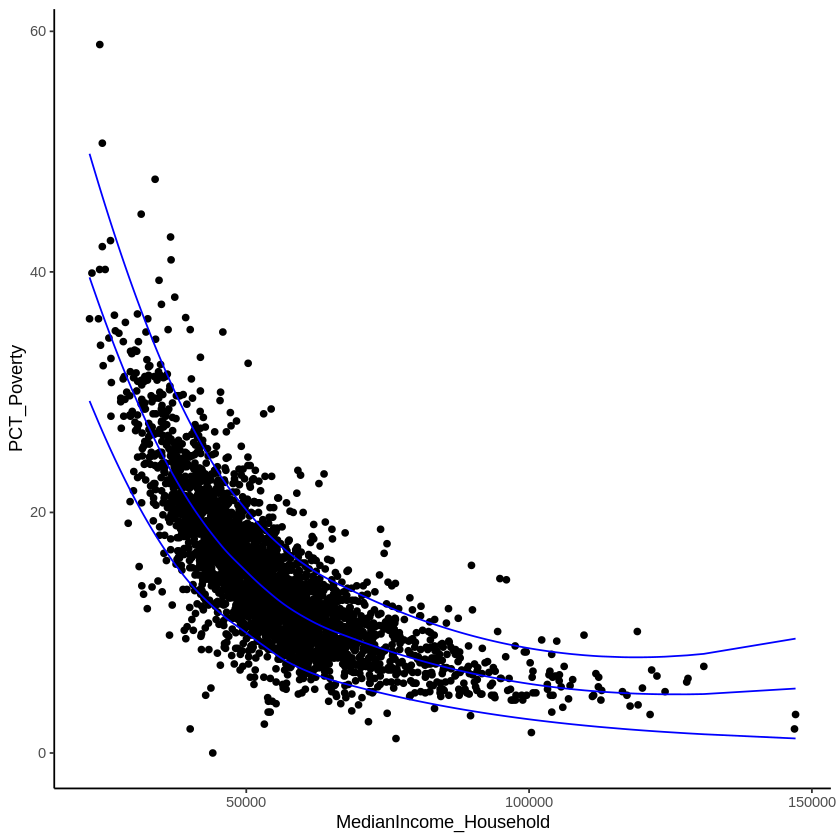

In [ ]:
#Create plot with Conditional Mean Function via Loess
ggplot(data=USCountyIncome_with_Predicted_AbsResiduals_Predicted_AbsResidual_Bounds, aes(x=MedianIncome_Household,y=PCT_Poverty)) + 
  geom_point() + 
  geom_line(aes(x=MedianIncome_Household, y=Predicted_Poverty), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=LowerBound), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=UpperBound), col="blue") +
  theme_classic()

Using the patchwork() package for improved plotting.

In [ ]:
install.packages("patchwork")
library(patchwork)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



The following uses the **patchwork()** package to enhance the plotting.

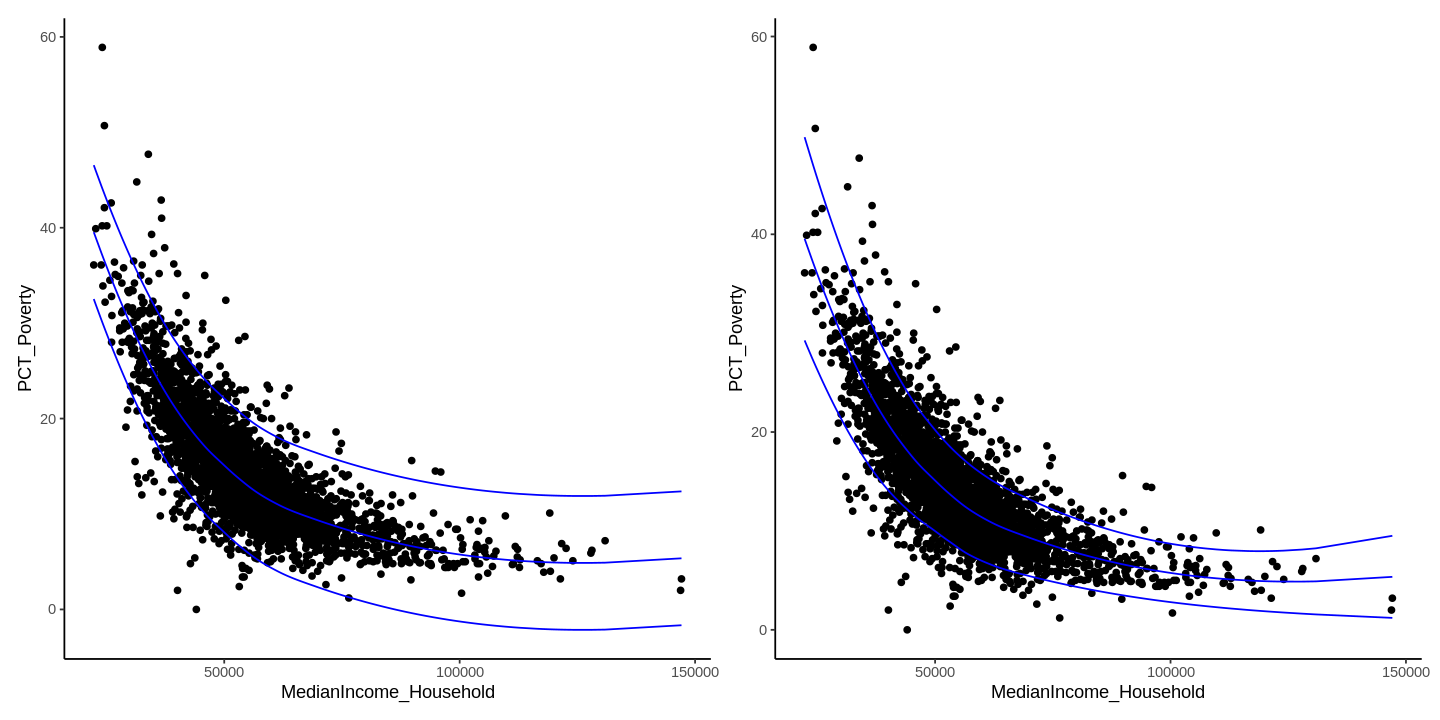

In [ ]:
# Specify and improved plotting region for COLAB
options(repr.plot.width = 12, repr.plot.height = 6)

#Create plot with Conditional Mean Function via Loess
plot1 <- ggplot(data=USCountyIncome_with_Predicted_Residuals_Bounds, aes(x=MedianIncome_Household,y=PCT_Poverty)) + 
  geom_point() + 
  geom_line(aes(x=MedianIncome_Household, y=Predicted_Poverty), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=LowerBound), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=UpperBound), col="blue") +
  theme_classic()


plot2 <- ggplot(data=USCountyIncome_with_Predicted_AbsResiduals_Predicted_AbsResidual_Bounds, aes(x=MedianIncome_Household,y=PCT_Poverty)) + 
  geom_point() + 
  geom_line(aes(x=MedianIncome_Household, y=Predicted_Poverty), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=LowerBound), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=UpperBound), col="blue") +
  theme_classic()

  plot1 + plot2

# Return plotting region back to default settings
options(repr.plot.width = 7, repr.plot.height = 7)

### Detection of Outliers

In [ ]:
(USCountyIncome_with_Predicted_AbsResiduals_Predicted_AbsResidual_Bounds
  %>% mutate(
              Outlier_HighSide = ifelse(PCT_Poverty > UpperBound, "Yes", "No"),
              Outlier_LowSide = ifelse(PCT_Poverty < LowerBound, "Yes", "No"),
            )
) -> USCountyIncome_Outliers

head(USCountyIncome_Outliers)

County_Name,State,FIPS,MedianIncome_Household,PCT_Poverty,Predicted_Poverty,Residual,AbsResidual,Predicted_AbsResidual,LowerBound,UpperBound,Outlier_HighSide,Outlier_LowSide
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
"Autauga County, AL",AL,01001,57982,15.2,11.88019,3.319811,3.319811,2.270260,7.339669,16.42071,No,No
"Baldwin County, AL",AL,01003,61756,9.2,10.92864,-1.728636,1.728636,2.168176,6.592284,15.26499,No,No
"Barbour County, AL",AL,01005,34990,28.6,24.80074,3.799262,3.799262,3.843224,17.114289,32.48719,No,No
"Bibb County, AL",AL,01007,51721,18.1,14.34085,3.759149,3.759149,2.474911,9.391028,19.29067,No,No
"Blount County, AL",AL,01009,48922,13.7,15.62687,-1.926866,1.926866,2.589702,10.447462,20.80627,No,No
"Bullock County, AL",AL,01011,33866,29.5,25.86508,3.634919,3.634919,3.942466,17.980150,33.75001,No,No


Creating a scatterplot showing the outliers on the high-side.

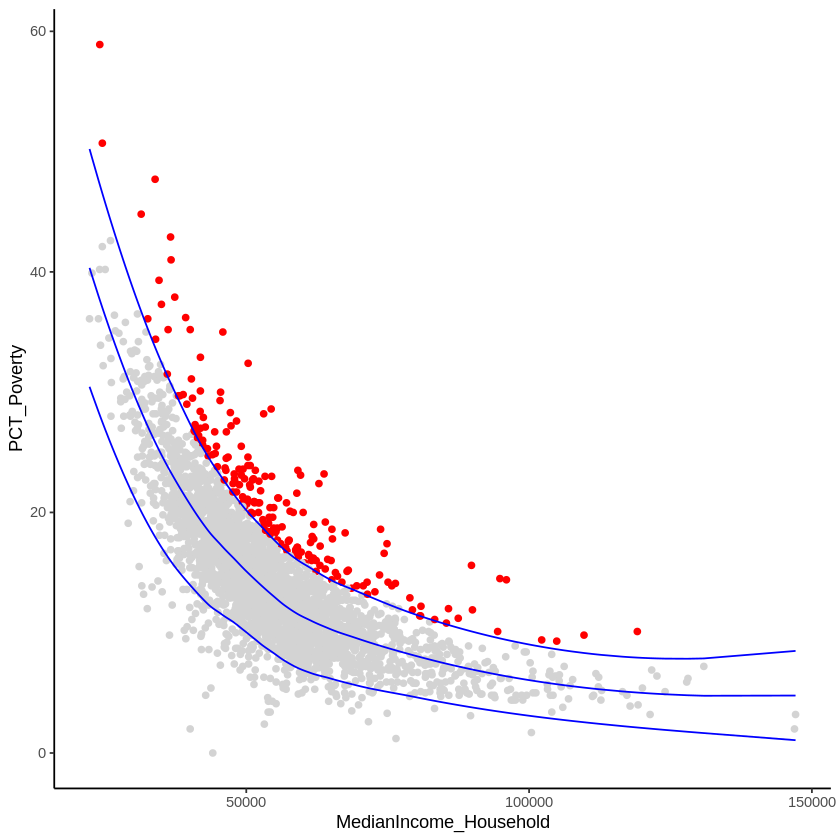

In [ ]:
ggplot(data=USCountyIncome_Outliers, aes(x=MedianIncome_Household,y=PCT_Poverty, col=Outlier_HighSide)) + 
  geom_point() + 
  scale_color_manual(values=c("lightgray", "red"))+
  geom_line(aes(x=MedianIncome_Household, y=Predicted_Poverty), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=LowerBound), col="blue") +
  geom_line(aes(x=MedianIncome_Household, y=UpperBound), col="blue") +
  theme_classic()+
    theme(legend.position = "none")
  

Next, getting a summary of the high-side outliers for each state.

In [ ]:
(USCountyIncome_Outliers
 %>% count(State, Outlier_HighSide)
 %>% group_by(State)
 %>% spread(Outlier_HighSide,n)
 %>% mutate(Percent = Yes/(No+Yes))
 %>% arrange(desc(Percent))
 %>% mutate(Percent = ifelse(is.na(Percent), 0, Percent))
 %>% rename(state = State)
) -> USCountyIncome_Outliers_by_State

USCountyIncome_Outliers_by_State

state,No,Yes,Percent
<chr>,<int>,<int>,<dbl>
CA,40,18,0.310344828
AZ,11,4,0.266666667
AK,23,7,0.233333333
NM,26,7,0.212121212
SD,52,14,0.212121212
NJ,17,4,0.190476190
NV,14,3,0.176470588
LA,54,10,0.156250000
NY,54,8,0.129032258


## Plotting High-Side Outliers on US Map

In [ ]:
install.packages("usmap")
library(usmap)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



The following code can be used to create a US map.

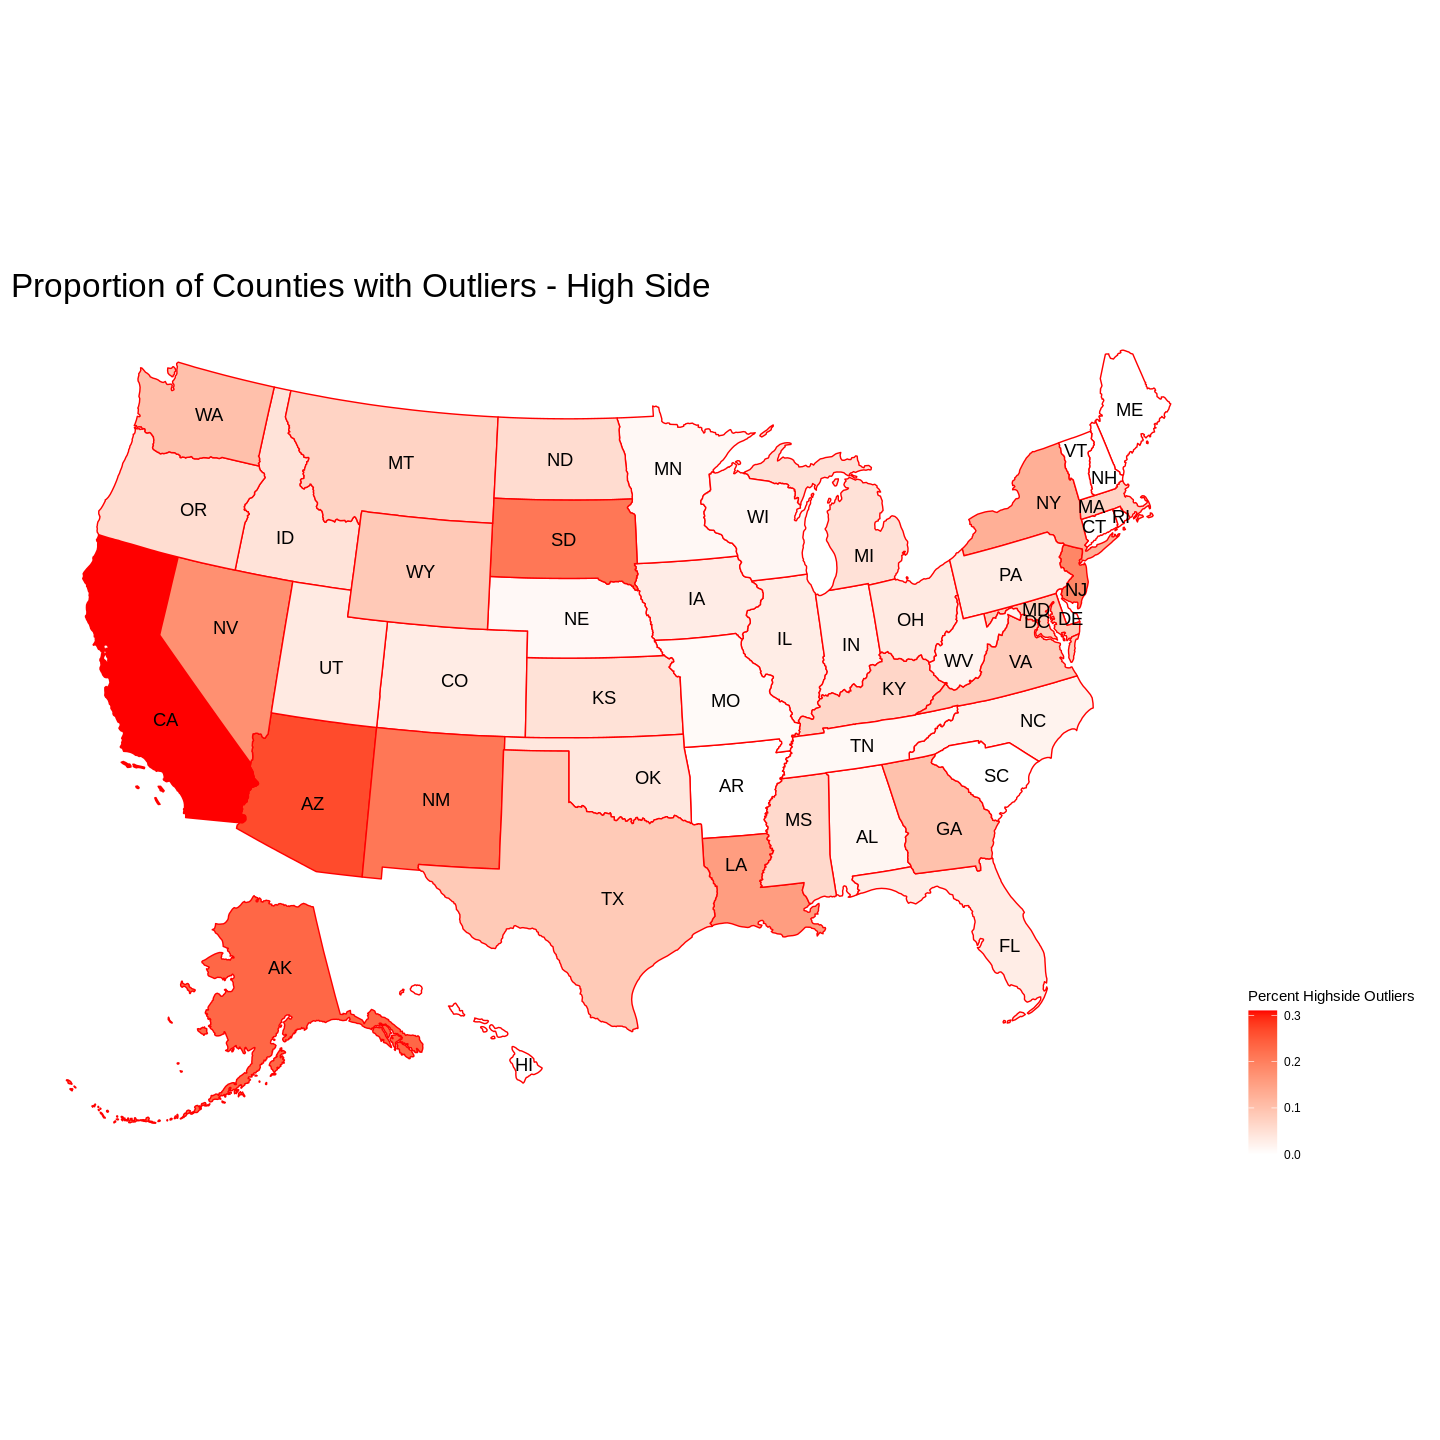

In [ ]:
# Specify and improved plotting region for COLAB
options(repr.plot.width = 12, repr.plot.height = 12)

plot_usmap(
            data = USCountyIncome_Outliers_by_State,
            region = "state",
            values = "Percent", 
            color = "red",
            labels=TRUE
          ) + 
              scale_fill_continuous(
                                      low = "white", high = "red", name = "Percent Highside Outliers"
                                   ) + 
              labs(title = "Proportion of Counties with Outliers - High Side") +
              theme(legend.position = "right", plot.title = element_text(size=20))

# Return to default setting
options(repr.plot.width = 7, repr.plot.height = 7)


Next, a map of each US County is being plotted.

fips,Outlier_1_0
<chr>,<dbl>
01001,0
01003,0
01005,0
01007,0
01009,0
01011,0


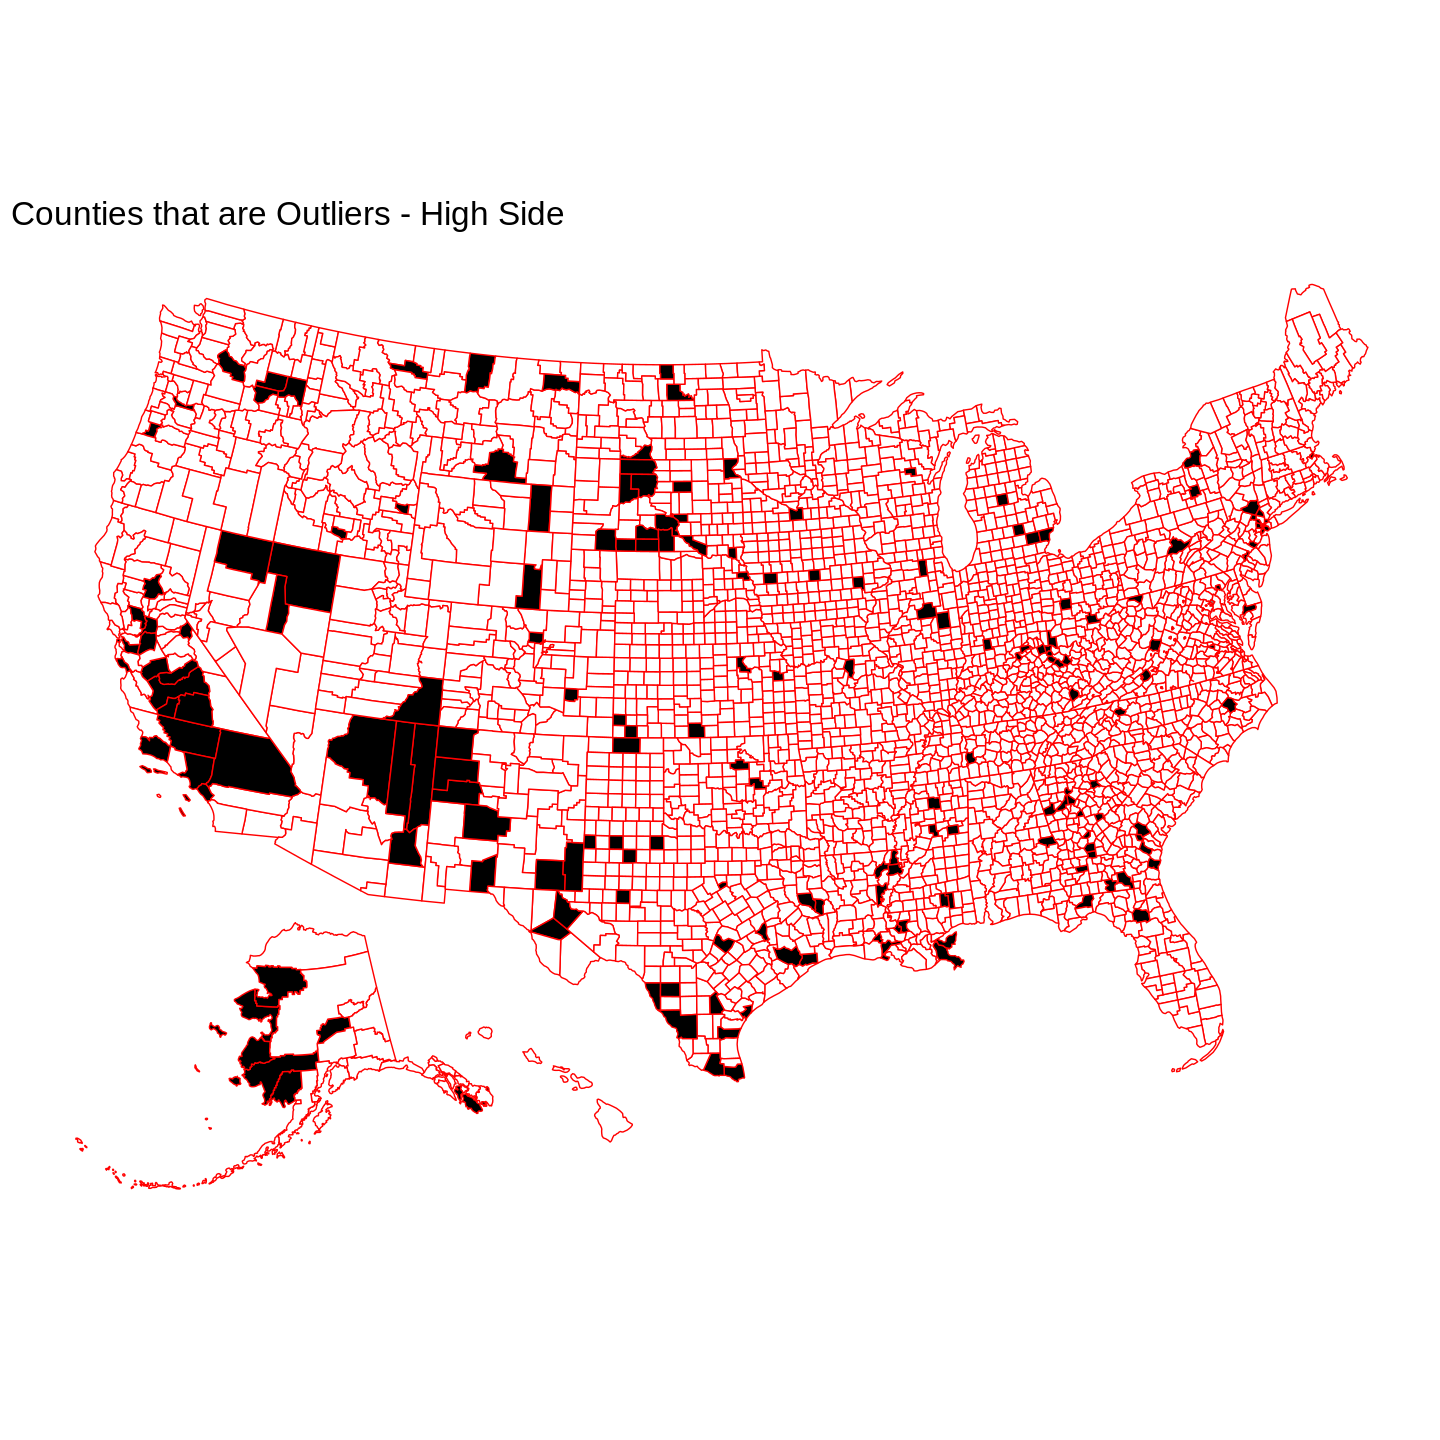

In [ ]:
# Specify and improved plotting region for COLAB
options(repr.plot.width = 12, repr.plot.height = 12)

(USCountyIncome_Outliers
  %>% select(State, County_Name, FIPS, Outlier_HighSide)
  %>% mutate(
              Outlier_1_0 = ifelse(Outlier_HighSide == "Yes",1,0)
             )
  %>% rename(fips=FIPS)
  %>% select(fips,Outlier_1_0)
) -> USCountyIncome_Outliers_1_0

head(USCountyIncome_Outliers_1_0)

plot_usmap(
            data = USCountyIncome_Outliers_1_0,
            region = "counties",
            values = "Outlier_1_0", 
            color = "red",
            labels=FALSE
          ) +
               scale_fill_continuous(
                                      low = "white", high ="black"
                                   ) + 
              labs(title = "Counties that are Outliers - High Side") +
              theme(legend.position = "none", plot.title = element_text(size=20))

# Return to default setting
options(repr.plot.width = 7, repr.plot.height = 7)

Getting a list of the counties in CA that are high-side outliers.

In [ ]:
(USCountyIncome_Outliers
 %>% select(State, County_Name, MedianIncome_Household, PCT_Poverty, Predicted_Poverty, Outlier_HighSide)
 %>% filter(State == "CA", Outlier_HighSide == "Yes")
)

State,County_Name,MedianIncome_Household,PCT_Poverty,Predicted_Poverty,Outlier_HighSide
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
CA,"Alameda County, CA",104888,9.3,5.718090,Yes
CA,"Alpine County, CA",85750,12.0,7.384726,Yes
CA,"Butte County, CA",54972,18.2,12.975460,Yes
CA,"Fresno County, CA",57109,20.8,12.163200,Yes
CA,"Kern County, CA",54851,20.4,13.024251,Yes
CA,"Kings County, CA",61556,16.0,10.974427,Yes
CA,"Madera County, CA",61924,19.0,10.891027,Yes
CA,"Merced County, CA",56330,18.8,12.436298,Yes
CA,"Orange County, CA",94441,10.1,6.515686,Yes




---



---



### Computation of $R^2$

In [ ]:
(USCountyIncome_with_Predicted
  %>% summarize(
                  Mean = mean(PCT_Poverty),
                  Variance = var(PCT_Poverty),
                  Count = n(),
                  SSE_Marginal = (Count-1)*Variance
  )
)

(USCountyIncome_with_Predicted
  %>% mutate(
              Residual = (PCT_Poverty - Predicted_Poverty),
              Residual_Squared = (Residual)^2
            )
) -> USCountyIncome_with_MeanPrediction_and_Residuals

(USCountyIncome_with_MeanPrediction_and_Residuals
  %>% summarize(
                SSE_Conditional = sum(Residual_Squared)
  )
)

Mean,Variance,Count,SSE_Marginal
<dbl>,<dbl>,<int>,<dbl>
14.60172,38.4488,3142,120767.7


SSE_Conditional
<dbl>
38534.4


$$\begin{array}{rcl}
R^{2} & = & \frac{\mbox{Total Unexplained Variation in Marginal} - \mbox{Total Unexplained Variation in Conditional}}{\mbox{Total Unexplained Variation in Marginal}}\\
& = & \frac{120767.7-38534.4}{120767.7} \\
& = & \frac{82233.3}{120767.7} \\
& = & 0.6809 \\
& \approx & 68\%
\end{array}
$$

The $R^2$ can be computed using the correlation between the actual values and predicted values.

In [ ]:
(USCountyIncome_with_Predicted
  %>% select(PCT_Poverty, Predicted_Poverty)
  %>% cor()
)

,PCT_Poverty,Predicted_Poverty
PCT_Poverty,1.0000000,0.8251929
Predicted_Poverty,0.8251929,1.0000000


The calculation for $R^2$ based on the square of the correlation.

$$\begin{array}{rcl}
R^{2} & = & (0.8252)^{2} \\
& = & 0.6809 \\
& \approx & 68\%
\end{array}
$$

---



---
End of Document
